In [4]:
# Install jika belum ada
!pip install tensorflow==2.17.0
!pip install matplotlib
!pip install opencv-python
!pip install pandas
!pip install scikit-learn


  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
  Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR:

In [10]:
!pip install "numpy<2"

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [5]:
!pip list

Package                   Version
------------------------- -----------
absl-py                   2.3.1
anyio                     4.11.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.4.0
asttokens                 3.0.0
astunparse                1.6.3
async-lru                 2.0.5
attrs                     25.4.0
babel                     2.17.0
beautifulsoup4            4.14.2
bleach                    6.2.0
certifi                   2025.10.5
cffi                      2.0.0
charset-normalizer        3.4.4
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
debugpy                   1.8.17
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.1
fastjsonschema            2.21.2
flatbuffers               25.9.23
fonttools                 4.60.1
fqdn                      1.5.1
gast                      0.6.0
google-pasta              0.2.0
grpcio          

In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU devices:", tf.config.list_physical_devices('GPU'))


2025-10-24 16:24:02.053898: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.20.0
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.config.list_physical_devices('GPU')


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15284069665481035452
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4251975680
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17071654201496389791
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


I0000 00:00:1761297856.112065    1996 gpu_device.cc:2020] Created device /device:GPU:0 with 4055 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [1]:
import tensorflow as tf
print("Is TF built with CUDA support:", tf.test.is_built_with_cuda())

2025-10-26 17:17:13.938676: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Is TF built with CUDA support: True


In [1]:
import os
import tensorflow as tf

2025-10-27 14:11:44.708359: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
os.path.join('Data','happy')

'Data/happy'

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [4]:
import cv2
import imghdr

/tmp/ipykernel_35496/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'Data'

In [6]:
image_exts = ["jpeg", "jpg", "bmp", "png"]

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 736 files belonging to 2 classes.


I0000 00:00:1761549118.433607   35496 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4055 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

In [12]:
#Class 1 = sad people
#Class 0 = happy people
batch

(array([[[[187.       , 195.       , 208.       ],
          [187.31055  , 195.31055  , 208.31055  ],
          [188.51758  , 196.51758  , 209.51758  ],
          ...,
          [161.51758  , 179.51758  , 193.51758  ],
          [160.31055  , 178.31055  , 192.31055  ],
          [159.10352  , 177.10352  , 191.10352  ]],
 
         [[187.       , 195.       , 208.       ],
          [187.31055  , 195.31055  , 208.31055  ],
          [188.51758  , 196.51758  , 209.51758  ],
          ...,
          [161.73712  , 179.73712  , 193.73712  ],
          [160.45187  , 178.45187  , 192.45187  ],
          [159.10352  , 177.10352  , 191.10352  ]],
 
         [[187.0918   , 195.0918   , 208.0918   ],
          [187.37384  , 195.37384  , 208.37384  ],
          [188.51758  , 196.51758  , 209.51758  ],
          ...,
          [162.04752  , 180.04752  , 194.04752  ],
          [160.68439  , 178.68439  , 192.68439  ],
          [159.19531  , 177.19531  , 191.19531  ]],
 
         ...,
 
         [[1

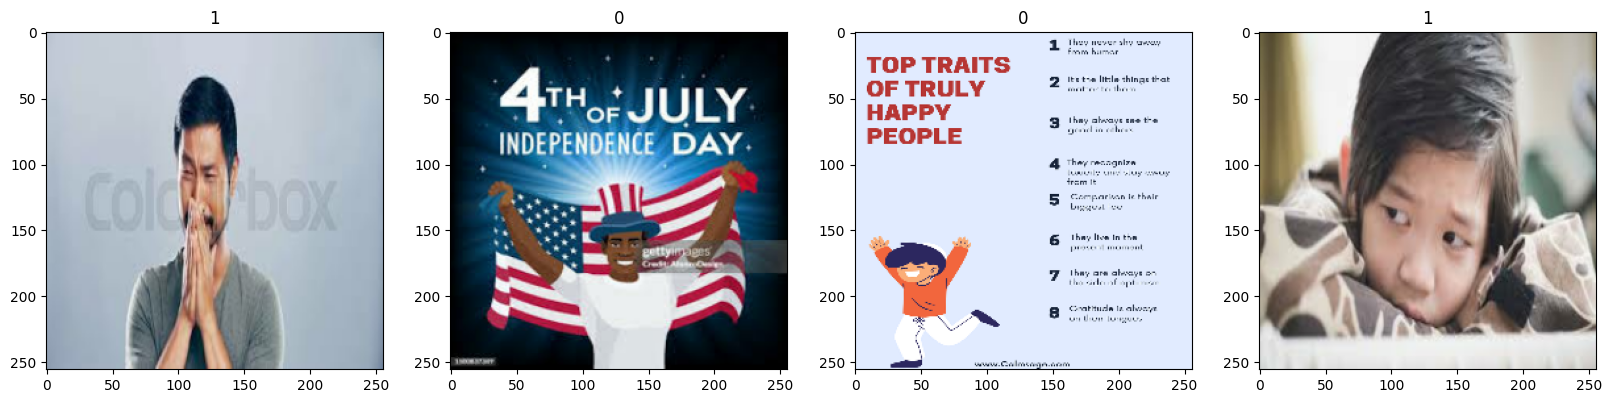

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data = data.map(lambda x, y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.570481  , 0.5744026 , 0.5897978 ],
          [0.11285999, 0.11678156, 0.12462469],
          [0.12561275, 0.13026194, 0.13446692],
          ...,
          [0.6759651 , 0.71271443, 0.692379  ],
          [0.6779948 , 0.7063189 , 0.67974114],
          [0.6784314 , 0.7058824 , 0.6784314 ]],
 
         [[0.570481  , 0.5744026 , 0.5897978 ],
          [0.11285999, 0.11678156, 0.12462469],
          [0.12561275, 0.13026194, 0.13446692],
          ...,
          [0.67638147, 0.7131309 , 0.6927954 ],
          [0.67998916, 0.7083133 , 0.68173546],
          [0.68067557, 0.70812654, 0.68067557]],
 
         [[0.57156515, 0.5754867 , 0.59088194],
          [0.11298534, 0.1169069 , 0.12475004],
          [0.12652975, 0.13117896, 0.13538392],
          ...,
          [0.6787357 , 0.71548504, 0.69514954],
          [0.6837316 , 0.71205574, 0.6854779 ],
          [0.6835206 , 0.7109716 , 0.6835206 ]],
 
         ...,
 
         [[0.10867801, 0.15965839, 0.18318781],
          [0.10867

In [16]:
scaled_iterator = data.as_numpy_iterator()

In [17]:
batch[0].min()

np.float32(0.0)

In [18]:
len(data)

23

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [20]:
print(train_size)
print(val_size)
print(test_size)

16
4
3


In [21]:
train = data.take(train_size)
val = data.skip(val_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) # layer menerima gambar 256x256 dan mengekstraksi fitur dasar (garis, tepi, dll).
model.add(MaxPooling2D()) # mengurangi ukuran 256x256 -> 128x128 -> 64x64 dst.....

model.add(Conv2D(32, (3,3), 1, activation='relu')) # set filter 32 agar model belajar lebih banyak pola yang kompleks
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu')) # turun ke 16 untuk mneyeimbangkan kompleksitas dan menghindari overfitting
model.add(MaxPooling2D())

model.add(Flatten()) # merubah hasil 2d menjadi 1d (penting sebelum masuk ke dense layer)
model.add(Dense(256, activation='relu')) # model belajar menggabungkan semua fitur visual untuk membuat keputusan
model.add(Dense(1, activation='sigmoid')) # output layer menghasilkan nilai antara 0-1

/home/steve/tfproject/Deep-Learning/ImageClassification/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2025-10-27 14:12:06.380617: I external/local_xla/xla/service/service.cc:163] XLA service 0x7b1a38205af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-27 14:12:06.380716: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-10-27 14:12:06.411032: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-10-27 14:12:06.736137: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-27 14:12:08.144451: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91400
2025-10-27 14:12:09.855964: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,16,254,254]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,256,256]{3

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.5208 - loss: 0.8630

2025-10-27 14:12:25.408410: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-10-27 14:12:26.421655: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,16,254,254]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,256,256]{3,2,1,0}, f32[16,3,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-10-27 14:12:27.470048: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,32,125,125]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,16,127,127]{3,2,1,0}, f32[32,16,

16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 404ms/step - accuracy: 0.5469 - loss: 0.7901 - val_accuracy: 0.7578 - val_loss: 0.6529
Epoch 2/20
 1/16 ━━━━━━━━━━━━━━━━━━━━ 5s 344ms/step - accuracy: 0.8438 - loss: 0.6241

2025-10-27 14:12:29.051431: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.6961 - loss: 0.6422

2025-10-27 14:12:32.068194: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.6562 - loss: 0.6358 - val_accuracy: 0.8047 - val_loss: 0.5352
Epoch 3/20
 1/16 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - accuracy: 0.7500 - loss: 0.5188

2025-10-27 14:12:32.437642: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.7933 - loss: 0.5129

2025-10-27 14:12:35.306727: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - accuracy: 0.7812 - loss: 0.5047 - val_accuracy: 0.8125 - val_loss: 0.4043
Epoch 4/20
 1/16 ━━━━━━━━━━━━━━━━━━━━ 5s 340ms/step - accuracy: 0.7812 - loss: 0.4109

2025-10-27 14:12:36.109175: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.8068 - loss: 0.4026

2025-10-27 14:12:38.796578: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.7910 - loss: 0.4218 - val_accuracy: 0.8906 - val_loss: 0.3182
Epoch 5/20
 1/16 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step - accuracy: 0.8125 - loss: 0.4270

2025-10-27 14:12:39.619229: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.8559 - loss: 0.3499

2025-10-27 14:12:42.308827: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.8457 - loss: 0.3653 - val_accuracy: 0.9219 - val_loss: 0.2827
Epoch 6/20


2025-10-27 14:12:42.905493: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9003 - loss: 0.2709

2025-10-27 14:12:45.593024: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - accuracy: 0.8828 - loss: 0.2889 - val_accuracy: 0.9688 - val_loss: 0.2031
Epoch 7/20
 1/16 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.9688 - loss: 0.1504

2025-10-27 14:12:46.352170: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.9243 - loss: 0.2039

2025-10-27 14:12:48.885840: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.9004 - loss: 0.2249 - val_accuracy: 0.9219 - val_loss: 0.2025
Epoch 8/20


2025-10-27 14:12:49.202164: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9363 - loss: 0.1560

2025-10-27 14:12:51.990100: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - accuracy: 0.9316 - loss: 0.1776 - val_accuracy: 0.9766 - val_loss: 0.1146
Epoch 9/20
 1/16 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 1.0000 - loss: 0.0488

2025-10-27 14:12:52.670354: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - accuracy: 0.9492 - loss: 0.1389 - val_accuracy: 0.9609 - val_loss: 0.0959
Epoch 10/20
 1/16 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - accuracy: 1.0000 - loss: 0.0768

2025-10-27 14:12:55.475991: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.9629 - loss: 0.1070 - val_accuracy: 0.9766 - val_loss: 0.1073
Epoch 11/20
 1/16 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 0.9375 - loss: 0.1276

2025-10-27 14:12:58.778376: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.9531 - loss: 0.1220 - val_accuracy: 0.9844 - val_loss: 0.0806
Epoch 12/20
 1/16 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 1.0000 - loss: 0.0543

2025-10-27 14:13:01.861978: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9787 - loss: 0.0812

2025-10-27 14:13:04.540917: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.9727 - loss: 0.0942 - val_accuracy: 0.9688 - val_loss: 0.1053
Epoch 13/20
 4/16 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.9733 - loss: 0.0545

2025-10-27 14:13:05.865668: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9732 - loss: 0.0708

2025-10-27 14:13:08.262699: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.9668 - loss: 0.0939 - val_accuracy: 0.9844 - val_loss: 0.0478
Epoch 14/20


2025-10-27 14:13:08.708378: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9776 - loss: 0.0763

2025-10-27 14:13:11.480132: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.9746 - loss: 0.0787 - val_accuracy: 0.9844 - val_loss: 0.0479
Epoch 15/20


2025-10-27 14:13:12.150829: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9933 - loss: 0.0417

2025-10-27 14:13:14.776849: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.9863 - loss: 0.0519 - val_accuracy: 0.9766 - val_loss: 0.0375
Epoch 16/20
 1/16 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - accuracy: 0.9688 - loss: 0.0356

2025-10-27 14:13:15.531732: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9872 - loss: 0.0324

2025-10-27 14:13:18.297695: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - accuracy: 0.9805 - loss: 0.0487 - val_accuracy: 0.9922 - val_loss: 0.0217
Epoch 17/20
 1/16 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - accuracy: 1.0000 - loss: 0.0131

2025-10-27 14:13:18.980667: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9820 - loss: 0.0483

2025-10-27 14:13:21.775500: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - accuracy: 0.9805 - loss: 0.0463 - val_accuracy: 0.9922 - val_loss: 0.0228
Epoch 18/20


2025-10-27 14:13:22.408185: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.9863 - loss: 0.0313 - val_accuracy: 0.9844 - val_loss: 0.0277
Epoch 19/20


2025-10-27 14:13:25.596872: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9848 - loss: 0.0335

2025-10-27 14:13:28.654477: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.9785 - loss: 0.0469 - val_accuracy: 0.9922 - val_loss: 0.0180
Epoch 20/20
 1/16 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.9688 - loss: 0.0444

2025-10-27 14:13:29.298855: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.9877 - loss: 0.0263

2025-10-27 14:13:31.971873: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.9902 - loss: 0.0281 - val_accuracy: 1.0000 - val_loss: 0.0043


<function matplotlib.pyplot.show(close=None, block=None)>

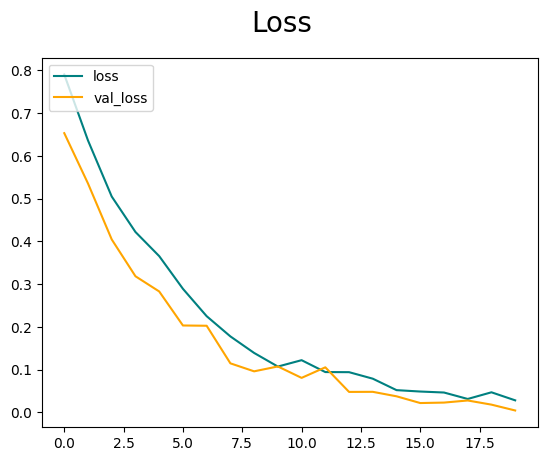

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

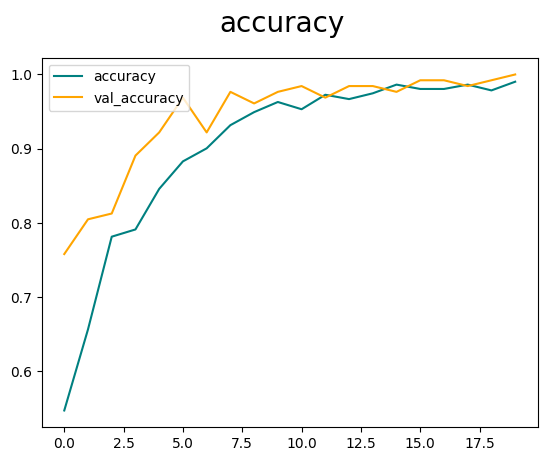

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2025-10-27 14:13:33.454173: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


2025-10-27 14:13:34.786350: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9821428656578064, Recall:0.9821428656578064, Accuracy:0.9791666865348816


<function matplotlib.pyplot.show(close=None, block=None)>

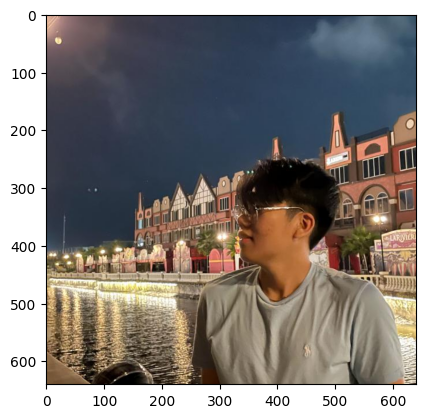

In [36]:
img = cv2.imread('willie.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

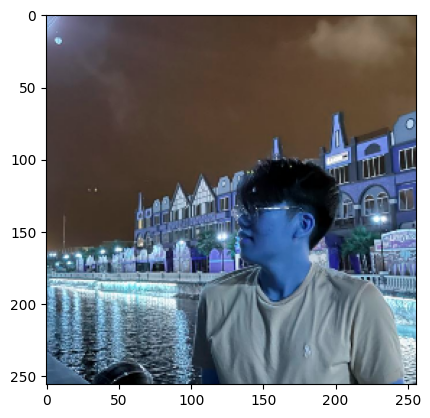

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show

In [38]:
resize.shape

TensorShape([256, 256, 3])

In [39]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [41]:
yhat

array([[0.9995701]], dtype=float32)

In [ ]:
class_names = ['happy', 'sad']
pred_index = int(yhat[0][0] > 0.5)
print(f"Predicted class: {class_names[pred_index]}")

In [161]:
img = cv2.imread('kevin.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (256, 256))

# Prediksi
yhat = model.predict(np.expand_dims(resize / 255, 0))

# Ambil class_names dari dataset asli
class_names = ['happy', 'sad']

pred_index = int(yhat[0][0] > 0.5)
print(f"Predicted class: {class_names[pred_index]} (confidence: {yhat[0][0]:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: sad (confidence: 0.94)


In [50]:
!pwd
!ls

/home/steve/tfproject/Deep-Learning/ImageClassification
 Data			       fajar.jpg  'logs (2)'	      venv
'Image Classification.ipynb'   kevin.jpg   requirements.txt   willie.jpg
 Test.jpg		       logs	   tf-gpu
